In [7]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from biosppy.signals import eeg

## Save data to csv and generate pdf with graphs

In [10]:
def save_csv_and_plots_to_single_pdf(sample_dir_path, name):
  csv_graphs_path = sample_dir_path + "csv+graphs/"
  sample_path = sample_dir_path + name + ".txt"
  filtered = []
  raw = []
  if os.path.exists(csv_graphs_path + name):
    shutil.rmtree(csv_graphs_path + name)
  os.mkdir(csv_graphs_path + name)
  for i in range (0, 6):
    a=np.loadtxt(sample_path)[:,i-6]
    out = eeg.eeg(signal=a, sampling_rate=100., show=False)
    filtered.append(out["filtered"])
    raw.append(out[0])
    np.savetxt(csv_graphs_path + name + '/filtered'+str(i)+'.csv', filtered[i], delimiter=",")
    np.savetxt(csv_graphs_path + name + '/raw'+str(i)+'.csv', filtered[i], delimiter=",")
  fig, axs = plt.subplots(6, 1, figsize=(2000, 20))
  filtered[4] *= 10
  filtered[5] *= 10
  for k in range(0, 6):
    axs[k].set_xlim(0, len(filtered[k]))
    axs[k].set_ylim(-500, 500)
    axs[k].plot(filtered[k])
    axs[k].locator_params(nbins=1000, axis='x')
  axs[0].set_title('czoło prawe')
  axs[1].set_title('skroń prawa')
  axs[2].set_title('środek')
  axs[3].set_title('tył')
  axs[4].set_title('czoło lewe')
  axs[5].set_title('skroń lewa')
  # fig.set_figwidth(655)
  # fig.set_figheight(131)
  fig.savefig(csv_graphs_path + name + '.pdf', bbox_inches='tight')
  plt.close()

In [11]:
sample_dir_path = 'C:/Users/kubaf/PycharmProjects/VR_Sickness_server_app/eeg_data/Testy_05_03_2024/'
save_csv_and_plots_to_single_pdf(sample_dir_path, "marek_05_03_2024_first")

## Frequency analysis

In [65]:
from biosppy.signals import eeg

In [66]:
sample_path = 'C:/Users/kubaf/PycharmProjects/VR_Sickness_server_app/eeg_data/Testy_05_03_2024/'
sample_name = 'marek_05_03_2024_fourth.txt'
x=np.transpose(np.loadtxt(sample_path+sample_name)[:,5:11])
data_range = (0, 1000)

In [70]:
frequencies = [eeg.eeg(signal=i[data_range[0]:data_range[1]], sampling_rate=100., show=False) for i in x]
out = eeg.eeg(signal=x[0], sampling_rate=100., show=False)

In [ ]:
"""
ts : array
    Signal time axis reference (seconds).
filtered : array
    Filtered EEG signal.
features_ts : array
    Features time axis reference (seconds).
theta : array
    Average power in the 4 to 8 Hz frequency band; each column is one EEG
    channel.
alpha_low : array
    Average power in the 8 to 10 Hz frequency band; each column is one EEG
    channel.
alpha_high : array
    Average power in the 10 to 13 Hz frequency band; each column is one EEG
    channel.
beta : array
    Average power in the 13 to 25 Hz frequency band; each column is one EEG
    channel.
gamma : array
    Average power in the 25 to 40 Hz frequency band; each column is one EEG
    channel.
plf_pairs : list
    PLF pair indices.
plf : array
    PLF matrix; each column is a channel pair.
"""

In [79]:
def show_plot(name):
  plt.figure(figsize=(30,3))
  plt.plot(frequencies[0][name])
  plt.title(name)

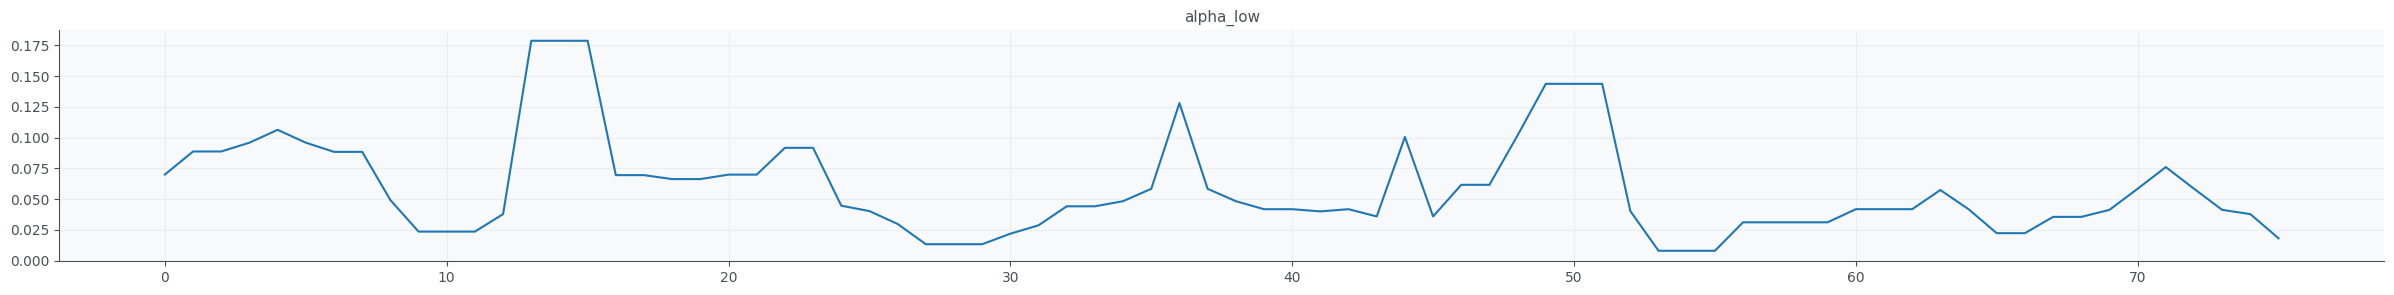

In [80]:
show_plot("alpha_low")

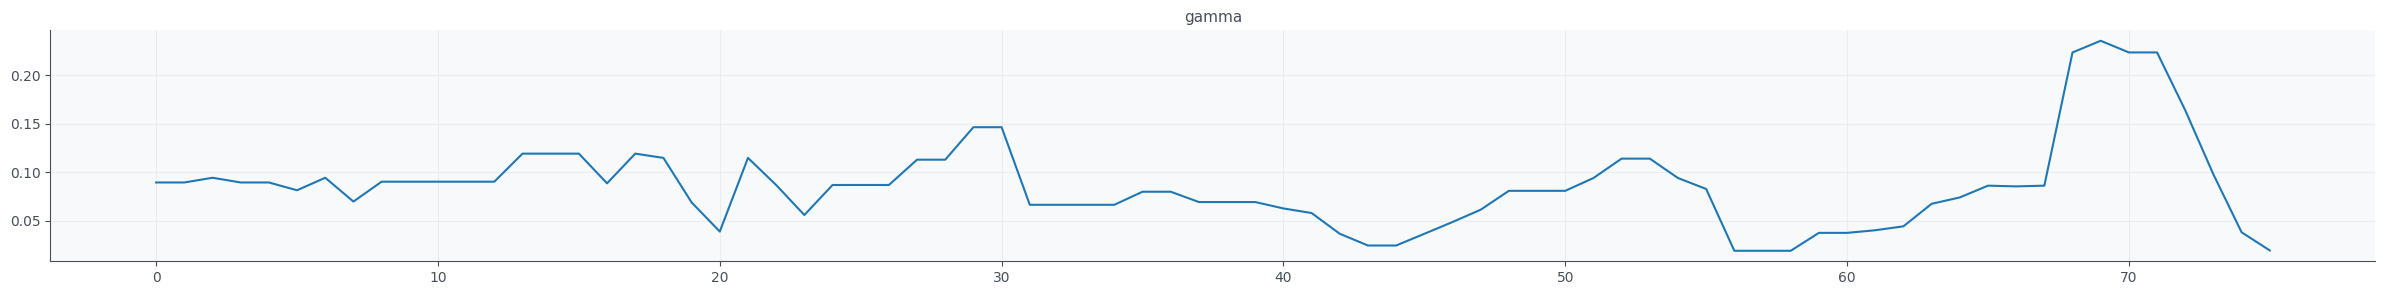

In [81]:
show_plot("gamma")